## Dimas Abdi Yudha
## 2109106005

# Unsupervised Learning

In [1]:
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Membaca dataset dan melihat isinya

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Subset & Data Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

df_subset = df[['age', 'avg_glucose_level']]
ss = StandardScaler()
x_scaled = ss.fit_transform(df_subset)

Mengambil data usia dan rata2 glukosa untuk menghitung kemungkinan terkena struk

# Menggunakan K-Means Clustering

In [6]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters = 3)
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [7]:
labels = model_kmeans.labels_
print(labels)

[1 1 2 ... 0 1 2]


## Membuat Cross_Tab untuk membandingkan antar cluster

In [8]:
df_kmeans = pd.DataFrame({'labels' : labels, 'stroke' : df.stroke})

# Buat crosstab
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['stroke'])
print(ct1)

stroke     0    1
labels           
0       2093    8
1        611   90
2       2157  151


## Melihat Centroid

In [9]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Untuk mengambil semua baris pada kolom tertentu (berbentuk array)
xs = x_scaled[:,0]
ys = x_scaled[:,1]

# Menampung koordinat dari semua centroid
centroids = model_kmeans.cluster_centers_

#Pisahkan centroid koordinat x dan y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

<function matplotlib.pyplot.show(close=None, block=None)>

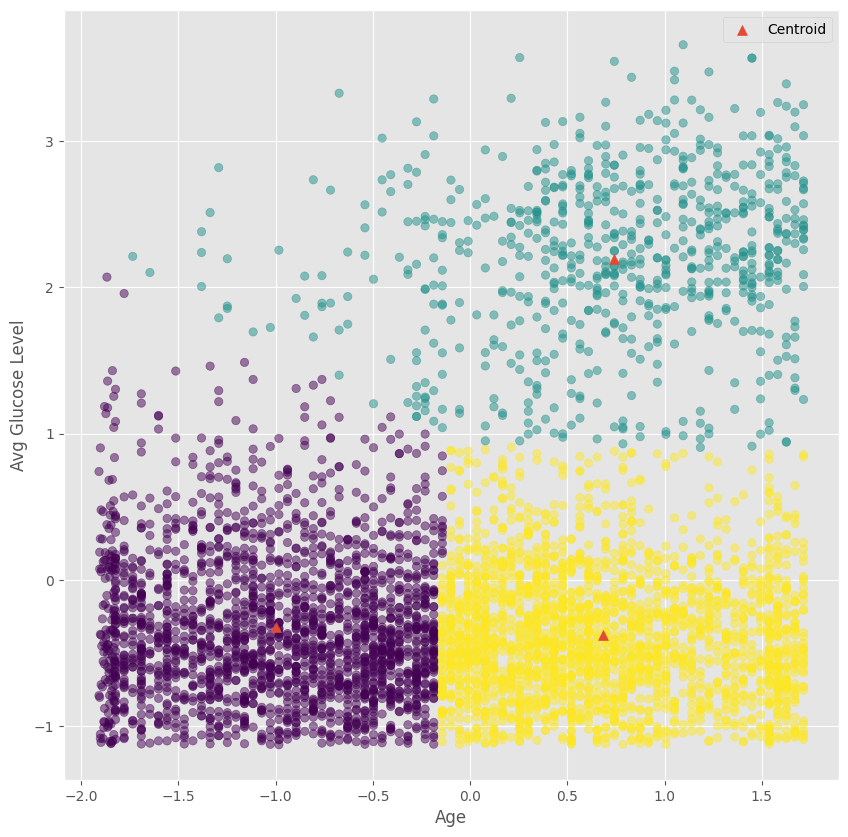

In [10]:
# Visualisasi Cluster
plt.figure(figsize=(10,10))

# Titik-titik data x dan y tiap cluster
plt.scatter(xs, ys, alpha=0.5, c = labels)

# Titik-titik centroid
plt.scatter(centroids_x, centroids_y, label = 'Centroid', marker="^", s=50)

# Beri label
plt.xlabel("Age")
plt.ylabel("Avg Glucose Level")

plt.legend()
plt.show

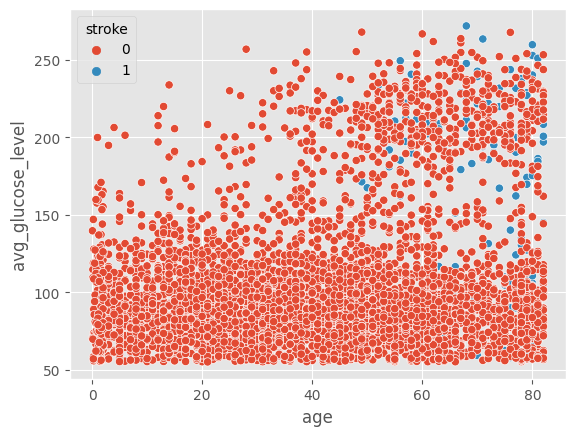

In [11]:
#Label Aktual
df_aktual = df[["age", "avg_glucose_level", "stroke"]]
sns.scatterplot(x = "age", y = "avg_glucose_level", 
                data = df_aktual, hue = "stroke")
plt.show()

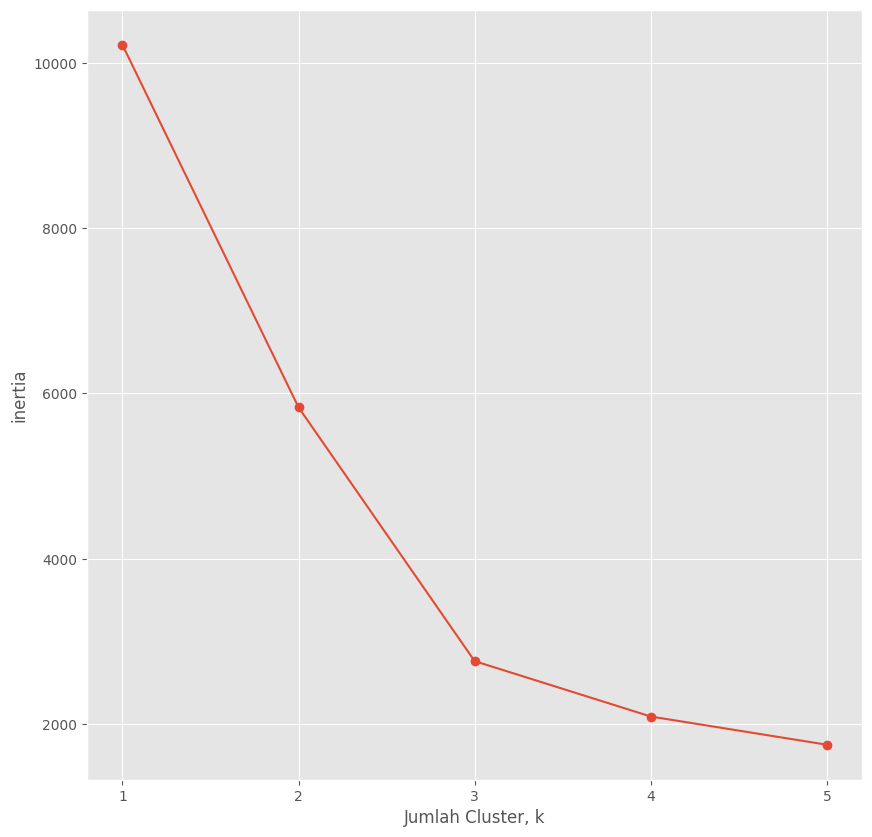

In [12]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Menggunakan Clustering Hierarki (Hierarchical)

In [13]:
from sklearn.cluster import AgglomerativeClustering

hc_cluster = AgglomerativeClustering(n_clusters = 3)
agg_cluster = hc_cluster.fit_predict(x_scaled)

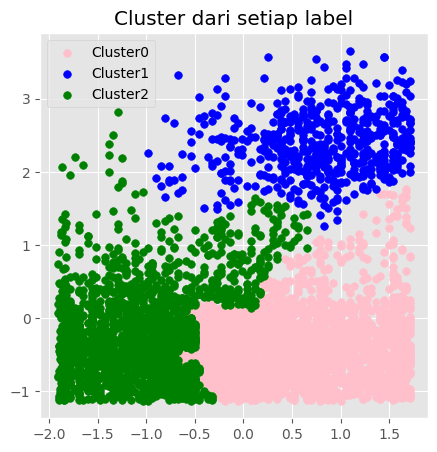

In [14]:
plt.figure(figsize=(5,5))

plt.scatter(x_scaled[agg_cluster == 0, 0],
           x_scaled[agg_cluster == 0, 1],
           c = 'pink', s = 30, label = 'Cluster0')

plt.scatter(x_scaled[agg_cluster == 1, 0],
           x_scaled[agg_cluster == 1, 1],
           c = 'blue', s = 30, label = 'Cluster1')

plt.scatter(x_scaled[agg_cluster == 2, 0],
           x_scaled[agg_cluster == 2, 1],
           c = 'green', s = 30, label = 'Cluster2')

plt.title("Cluster dari setiap label")
plt.legend()
plt.show()

# Membuat Dendogram

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendro = linkage(x_scaled, method = "ward")

<function matplotlib.pyplot.show(close=None, block=None)>

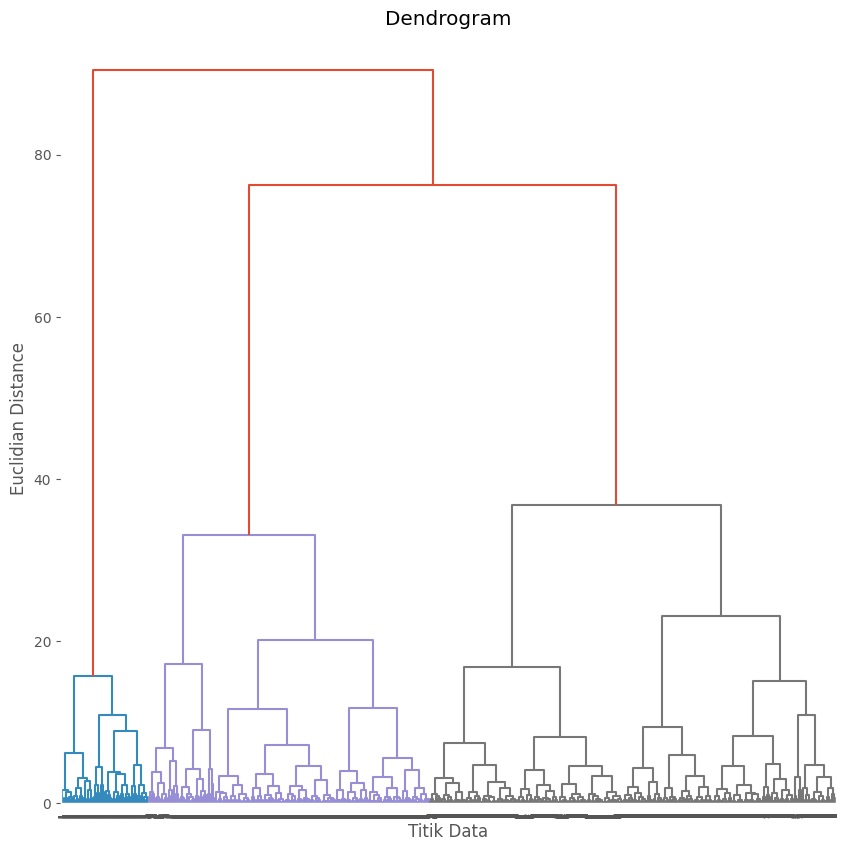

In [16]:
plt.figure(figsize=(10,10))
dendrogram(dendro,leaf_rotation = 90, labels = labels)
plt.xlabel("Titik Data")
plt.ylabel("Euclidian Distance")
plt.title("Dendrogram")
plt.show

## Mengambil Label dari cluster

In [19]:
from scipy.cluster.hierarchy import fcluster

labels2 = fcluster(dendro, 5, criterion='distance')
df_h = pd.DataFrame({'labels': labels2, 'stroke': df.stroke})
ct2 = pd.crosstab(df_h['labels'], df_h['stroke'])
print(ct2)

stroke    0   1
labels         
1        69  16
2       100  29
3        76   1
4       150  24
5       104   8
6       129   1
7        33   4
8        44   0
9       178   0
10       43   0
11      241   1
12      229   0
13      330   0
14      219   0
15      218   1
16      183   1
17      233   7
18      325  12
19      269   3
20      419   5
21      245  20
22       82  22
23      195  28
24      307  17
25      203  11
26       43  10
27      194  28


<AxesSubplot: xlabel='age', ylabel='avg_glucose_level'>

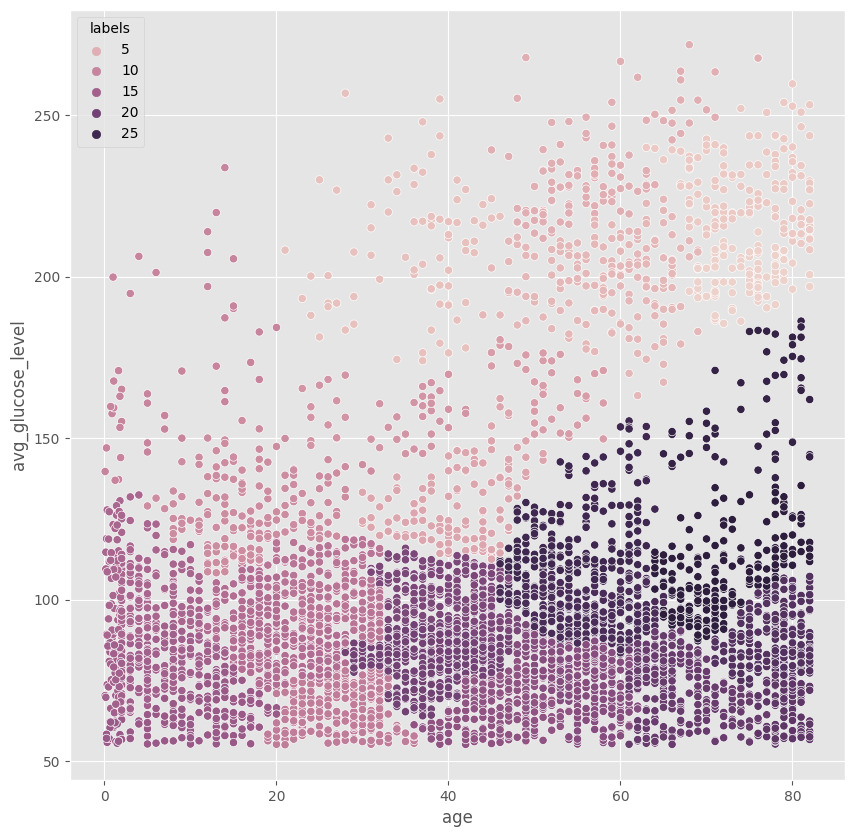

In [20]:
df_subset['labels'] = labels2
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'age', y = 'avg_glucose_level', hue = 'labels', data = df_subset)

# Evaluasi Model KMeans dan Hierarchical

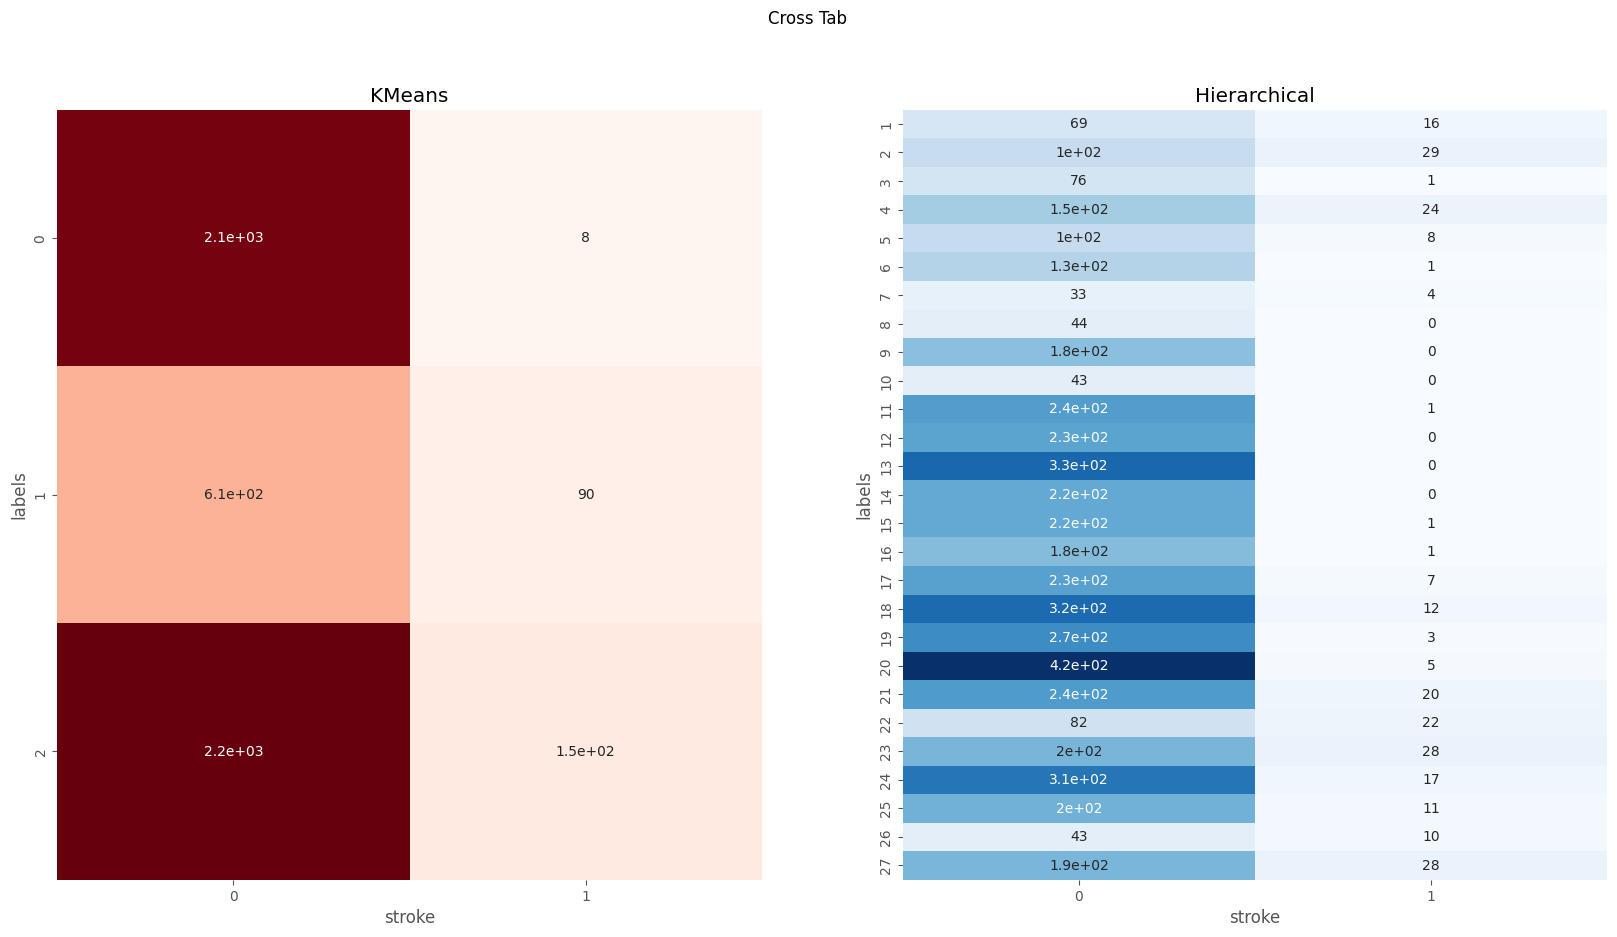

In [21]:
plt.figure(figsize=(20,10))
plt.suptitle("Cross Tab")

plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1, annot=True, cbar=False, cmap="Reds")

plt.subplot(1,2,2)
plt.title("Hierarchical")
sns.heatmap(ct2, annot=True, cbar=False, cmap="Blues")

plt.show()